<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/usando_mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import requests
import json
import geopandas as gpd

In [4]:
def geocode(city):
  """Geocodes a city using OpenStreetMap's Nominatim.

  Args:
    city: The name of the city to geocode.

  Returns:
    A tuple of latitude and longitude if successful, None otherwise.
  """

  # Set custom headers with your application identifier
  my_header = {'User-Agent': 'Google Colabs/1'}

  url = f"https://nominatim.openstreetmap.org/search?format=json&q={city}"
  response = requests.get(url, headers=my_header)

  if response.status_code == 200:
    data = json.loads(response.text)
    if data:
      try:
        lat = float(data[0]['lat'])
        lon = float(data[0]['lon'])
        return lat, lon
      except (IndexError, ValueError):
        pass  # Handle cases where data is missing or invalid

  return None


In [16]:
teresina = geocode("Teresina")
dc_ufpi = (-5.0561506302744625, -42.789858089112705)
reitoria_ufpi = (-5.057481171347096, -42.79158006716312)

In [19]:
import plotly.graph_objects as go

# Sample data (replace with your actual data)
latitudes = [reitoria_ufpi[0], dc_ufpi[0]]
longitudes = [reitoria_ufpi[1], dc_ufpi[1]]

# Determine which points to highlight (replace with your logic)
highlighted_indices = [0,1]  # Adjust this list as needed

fig = go.Figure()

# Create markers for all points
fig.add_trace(go.Scattermapbox(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=dict(
        size=8,
        color='blue'
    )
))

# Create markers for highlighted points
fig.add_trace(go.Scattermapbox(
    lat=[latitudes[i] for i in highlighted_indices if i < len(latitudes)],
    lon=[longitudes[i] for i in highlighted_indices if i < len(longitudes)],
    mode='markers',
    marker=dict(
        size=12,
        color='red'
    )
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center=dict(lat=reitoria_ufpi[0], lon=reitoria_ufpi[1]),
    mapbox_zoom=15
)

fig.show()

In [20]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/mapa_ufpi.png

--2024-08-20 15:15:59--  https://raw.githubusercontent.com/armandossrecife/teste/main/mapa_ufpi.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335297 (327K) [image/png]
Saving to: ‘mapa_ufpi.png’

mapa_ufpi.png       100%[===================>] 327.44K  --.-KB/s    in 0.05s   

2024-08-20 15:15:59 (6.81 MB/s) - ‘mapa_ufpi.png’ saved [335297/335297]



In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
img = mpimg.imread('mapa_ufpi.png')  # Replace with your image path

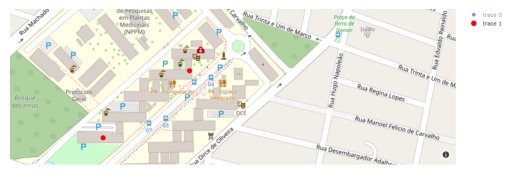

In [24]:
plt.imshow(img)
plt.axis('off')  # Optional: to remove axis
plt.show()